In [1]:
import os
import random
import numpy as np
from os import path
from tqdm import tqdm
from PIL import Image, ImageOps
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
target_size = 512
# original_path = 'C:\\Users\\Tran Minh Hieu\\Documents\\GitHub\\DeepLearning_InteriorDesignDataset\\v1.0\\'
# resize_path = 'D:\\Desktop\\Results_Crop\\'
# list_folder = os.listdir(original_path)

def customize_size(original_size, target_size):
    ratio = 1
    width, height = original_size
    ratio = (width / target_size) if (width < height) else (height / target_size)    
    return int(width / ratio), int(height / ratio)

def random_crop(folder, image_path, resize_path): # jumps is the number of pixels 
    img = Image.open(image_path)
    img = img.convert('RGB')
    img = img.resize(customize_size(img.size, target_size))
    x_max, y_max = np.array(img.size) - target_size
    
    try:        
        resize_path = '{}/{}/'.format(resize_path, folder)
        if path.exists(resize_path) == False:
            os.mkdir(resize_path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)

    i = 0
    for random_x in range(0, x_max + 1, 75):
        for random_y in range(0, y_max + 1, 75):
            area = (random_x, random_y, random_x + target_size, random_y + target_size)
            c_img = img.crop(area)
            
            fit_img_h = ImageOps.fit(c_img, (target_size, target_size), Image.ANTIALIAS)
            filename, ext = os.path.splitext(os.path.basename(image_path))
            filename = '{}_{}{}'.format(filename, i, ext)
            path_save = os.path.join(resize_path, str(i))
            if path.exists(path_save) == False: 
                os.mkdir(path_save)
            i = i + 1
            fit_img_h.save(os.path.join(path_save, filename))

In [ ]:
if path.exists(resize_path) == False: 
    os.mkdir(resize_path)
fail = []
for folder in (list_folder):
    folder_path = os.path.join(original_path, folder)
    image_paths = os.listdir(folder_path)
    for image_path in (image_paths):
        try:
            random_crop(folder, os.path.join(folder_path, image_path), resize_path)
        except OSError:
            fail.append(os.path.join(folder_path, image_path))
        else:
            fail.append(os.path.join(folder_path, image_path))

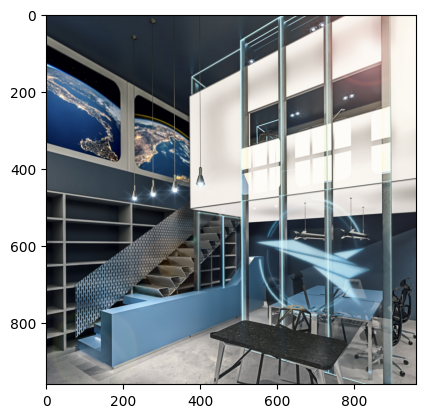

In [4]:

pil_im = Image.open(r'D:/Desktop/Test/Hitech.jpg', 'r')
imshow(np.asarray(pil_im))

In [ ]:
original_size = pil_im.size
print(original_size)
imshow(np.asarray(pil_im))


In [ ]:
new_size = customize_size(original_size, target_size)
print(new_size)
pil_im = pil_im.resize(new_size)
imshow(np.asarray(pil_im))

In [ ]:
print(random.randint(0, 1))

In [2]:
import cv2
from matplotlib import pyplot as plt

In [3]:
def demo_crop(image_path, ): # jumps is the number of pixels 
    img = Image.open(image_path)
    img = img.convert('RGB')
    img = img.resize(customize_size(img.size, target_size))
    x_max, y_max = np.array(img.size) - target_size
    
    i = 1
    num_croped = (x_max + 1) // 75 + (y_max + 1) // 75 + 1
    
    # create figure
    fig = plt.figure(figsize=(15, 15))

    # setting values to rows and column variables
    rows = 1
    columns = num_croped
    
    for random_x in range(0, x_max + 1, 75):
        for random_y in range(0, y_max + 1, 75):
            area = (random_x, random_y, random_x + target_size, random_y + target_size)
            c_img = img.crop(area)
            
            fit_img_h = ImageOps.fit(c_img, (target_size, target_size), Image.ANTIALIAS)
            
            # Adds a subplot
            fig.add_subplot(rows, columns, i)

            # showing image
            plt.axis('off')
            plt.title( 'croped_image_' + str(i))
            plt.imshow(fit_img_h)

            i = i + 1

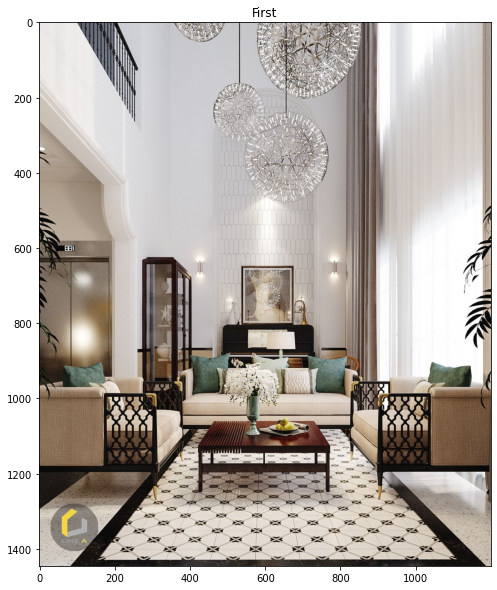

In [8]:
# Demo Crop Image
image_path = r'D:/Desktop/Test/Indochina.jpg'
# create figure
fig = plt.figure(figsize=(10, 10))
# reading images
image = Image.open(image_path)
image = image.convert('RGB')
# Adds a subplot at the 1st position
fig.add_subplot()
  
# showing image
# plt.axis('off')
plt.title("First")
plt.imshow(image)

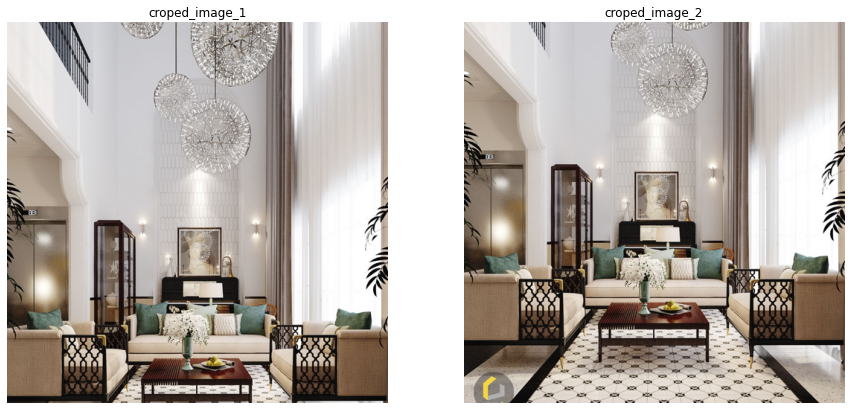

In [50]:
demo_crop(image_path)

In [59]:
## show demo crop image
import os
import math
import random
import numpy as np
from os import path
from tqdm import tqdm
from PIL import Image, ImageOps
from matplotlib.pyplot import imshow
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import time
from skimage import io
%matplotlib inline

target_size = 512

def get_image_from_url(url):
    return io.imread(url)

def gen_step(size, target_size): # size >= target_size
    frac, whole = math.modf(size / target_size) # get frac and whole
    if frac > 0.2: whole += 1 # if frac > 0.2 => increase whole
    # return result
    return int(whole)

def customize_size(original_size, target_size):
    ratio = 1
    width, height = original_size
    ratio = (width / target_size) if (width < height) else (height / target_size)    
    return int(width / ratio), int(height / ratio)

def crop_image(image, area):
    c_img = image.crop(area) # crop image with area
    # return with fit image
    return ImageOps.fit(c_img, (target_size, target_size), Image.ANTIALIAS)

def data_processing_for_api_demo(image_url, target_size=224):
    image = get_image_from_url(image_url)
    image = Image.fromarray(image.astype('uint8'), 'RGB')
    # get size to resize
    w, h = customize_size(image.size, target_size)

    # only for demo (original image)
    fig_size = (15, 5) if (w > h) else (5, 15)
    fig = plt.figure(figsize=fig_size)
    fig.add_subplot(1, 1, 1)
    plt.title( 'Orignal image ({}, {})'.format(image.size[0], image.size[1]))
    plt.imshow(image)

    # resize image
    image = image.resize((w, h))
    # get the number of images that can be taken in rows and columns
#     noCol = 100 #gen_step(w, target_size)
#     noRow = 100 #gen_step(h, target_size)

    # only for demo (resize image)
    fig = plt.figure(figsize=fig_size)
    fig.add_subplot(1, 1, 1)
    plt.title( 'Resize image ({}, {})'.format(w, h))
    plt.imshow(image)

    colors = ['g', 'b', 'w', 'c', 'm', 'y', 'k']


    # get step and position max for crop
    x_max, y_max = np.array((w, h)) - target_size # get max position
    # get step
    stepCol = 100#(x_max // (noCol - 1)) if (noCol > 1) else 1
    stepRow = 100#(y_max // (noRow - 1)) if (noRow > 1) else 1

    i = 1
    num_croped = (x_max //100 + 1) * (y_max // 100 + 1)
    
    print(num_croped)

    # setting values to rows and column variables
    rows = 1#num_croped // 3
    columns = 3#3
    

    # only for demo (croped image in original image)
    index = 0
    currentAxis = plt.gca()
    for random_x in range(0, x_max+1, stepCol):
        for random_y in range(0, y_max+1, stepRow + 1):
            currentAxis.add_patch(Rectangle((random_x, random_y), target_size, target_size, 
                                            fill=None, alpha=1, linestyle='-', color=colors[index], linewidth=2))
            index += 1

    # create figure (demo)
    fig = plt.figure(figsize=(15 , 5))

    for random_x in range(0, x_max + 1, stepCol):
        for random_y in range(0, y_max + 1, stepRow):
            # crop image
            area = (random_x, random_y, random_x + target_size, random_y + target_size)
            croped_image = crop_image(image, area)

            # Adds a subplot
            fig.add_subplot(rows, columns, i)

            # only for demo (croped image)
            # plt.axis('off')
            plt.title( 'Croped image ' + str(i))
            plt.imshow(croped_image)

            i += 1

3


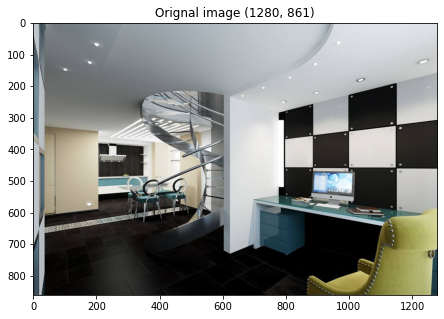

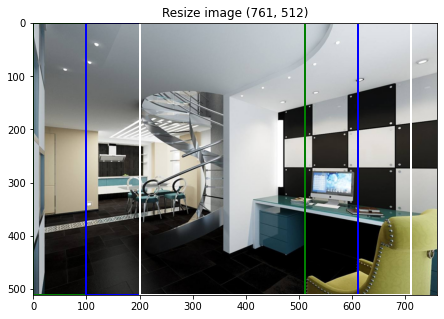

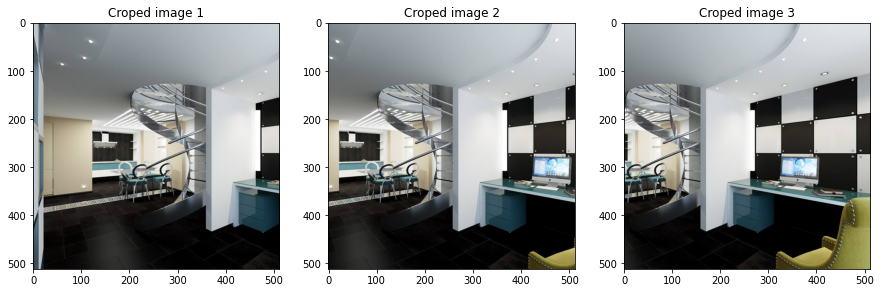

In [63]:
image_url=r'https://www.noithatanhvu.com.vn/wp-content/uploads/2020/04/phong-cach-noi-that-hitech-7.jpg'
data_processing_for_api_demo(image_url, target_size=512)

3


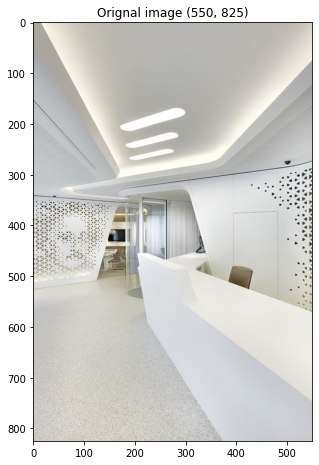

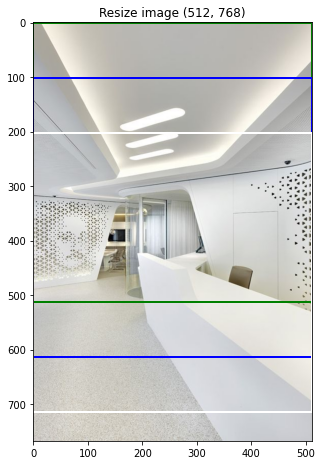

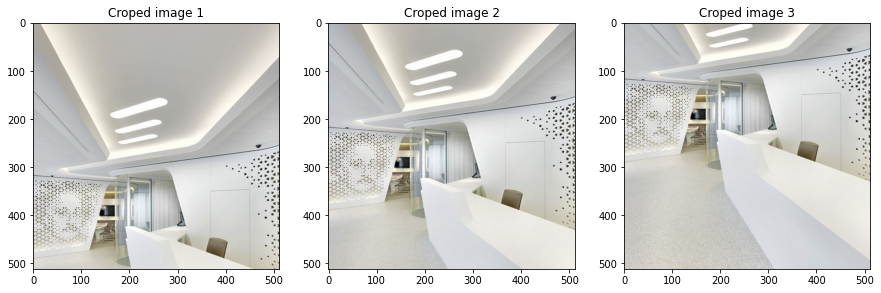

In [60]:
image_url=r'https://i.pinimg.com/originals/61/ef/93/61ef93c285c62426ab7072caad54b1c8.jpg'
data_processing_for_api_demo(image_url, target_size=512)

6


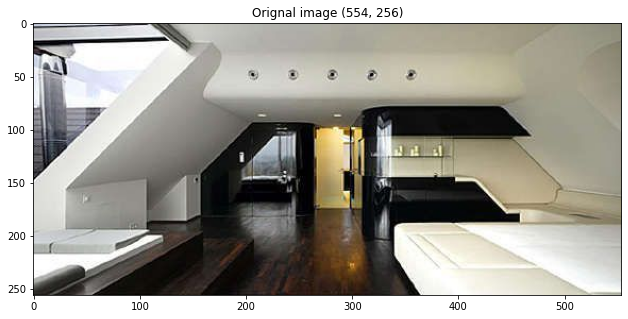

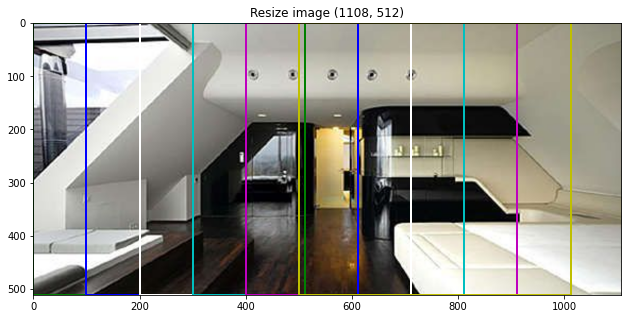

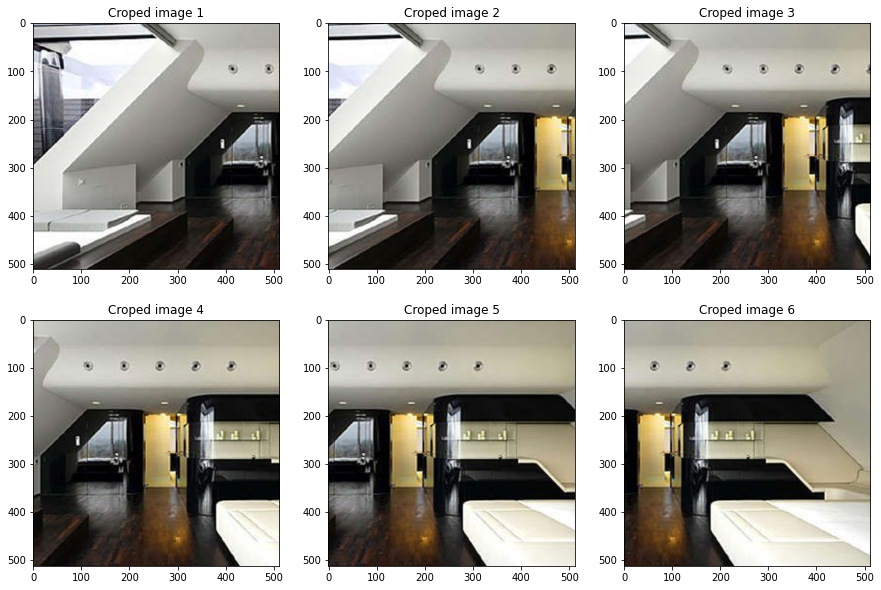

In [48]:
image_url=r'https://i.pinimg.com/564x/20/44/6d/20446dee2d3ef28b880a2ab2a605bcb8.jpg'
# image_url=r'https://i.pinimg.com/originals/61/ef/93/61ef93c285c62426ab7072caad54b1c8.jpg'
data_processing_for_api_demo(image_url, target_size=512)

1


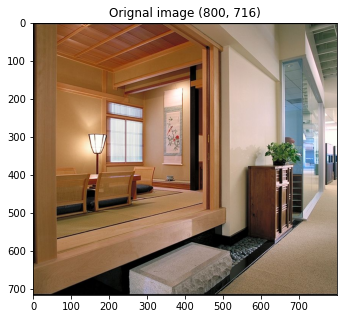

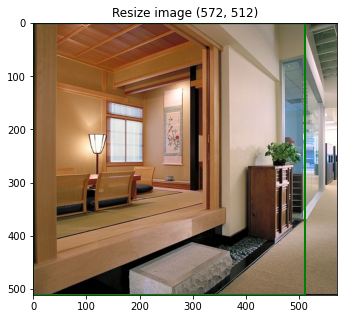

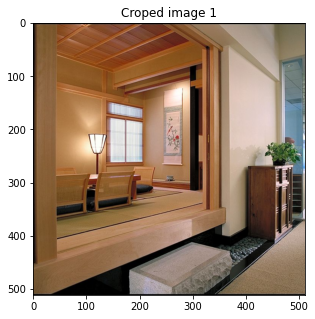

In [52]:
image_url=r'https://i.pinimg.com/originals/f6/c3/1e/f6c31e7f6608d5b49b2fb2cc369fa81e.jpg'
# image_url=r'https://i.pinimg.com/564x/20/44/6d/20446dee2d3ef28b880a2ab2a605bcb8.jpg'
# image_url=r'https://i.pinimg.com/originals/61/ef/93/61ef93c285c62426ab7072caad54b1c8.jpg'
data_processing_for_api_demo(image_url, target_size=512)